## Import Libraries

In [1]:
import sys
sys.path.append("..")

import numpy as np
import pandas as pd
from src import utils
from src.preprocessing import preprocess_data

import seaborn as sns
import matplotlib.pyplot as plt
from string import ascii_letters

pd.set_option("display.max_columns", None)
config = utils.get_config()

## Initial Explorations

In [2]:
# Train data
train_df = pd.read_csv(config["raw_data"]["path_train"])
train_df = preprocess_data(data=train_df, config=config)

train_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Response
id,,,,,,,,,,,,,
0,1,21,1,35,0,1,65101,124,187,1,0,0,0
1,1,43,1,28,0,1,58911,26,288,0,0,1,1
2,0,25,1,14,1,0,38043,152,254,0,1,0,0
3,0,35,1,1,0,1,2630,156,76,1,0,0,0
4,0,36,1,15,1,0,31951,152,294,1,0,0,0


## Descriptive Statistics

In [3]:
# Quick check
utils.initial_check(train_df)

,Column,Type,Null Count,Unique Count,Min,Max
0,Gender,int8,0,2,0,1
1,Age,int8,0,66,20,85
2,Driving_License,int8,0,2,0,1
3,Region_Code,int8,0,53,0,52
4,Previously_Insured,int8,0,2,0,1
5,Vehicle_Damage,int8,0,2,0,1
6,Annual_Premium,int32,0,51728,2630,540165
7,Policy_Sales_Channel,int16,0,152,1,163
8,Vintage,int16,0,290,10,299
9,Vehicle_Age_1-2 Year,int8,0,2,0,1


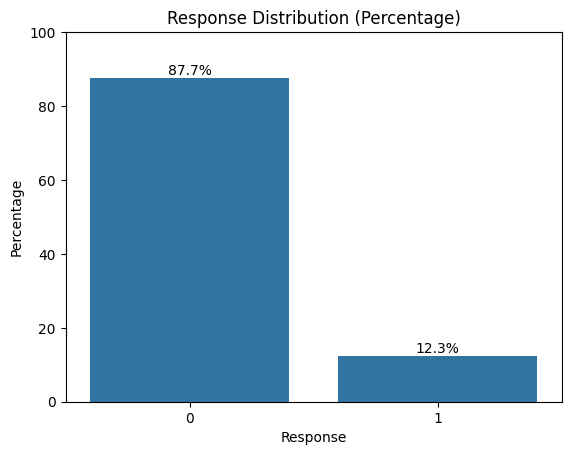

In [4]:
## Target distribution
# Calculate percentages
response_counts = train_df["Response"].value_counts()
response_percentages = response_counts / len(train_df) * 100

# Create the bar plot
ax = sns.barplot(x=response_percentages.index, y=response_percentages.values)

# Customize the y-axis to show percentages
ax.set_ylabel("Percentage")
ax.set_ylim(0, 100)  # Set y-axis range from 0 to 100%

# Add percentage labels on top of each bar
for i, v in enumerate(response_percentages.values):
    ax.text(i, v, f"{v:.1f}%", ha='center', va='bottom')

plt.title("Response Distribution (Percentage)")
plt.show()

## EDA

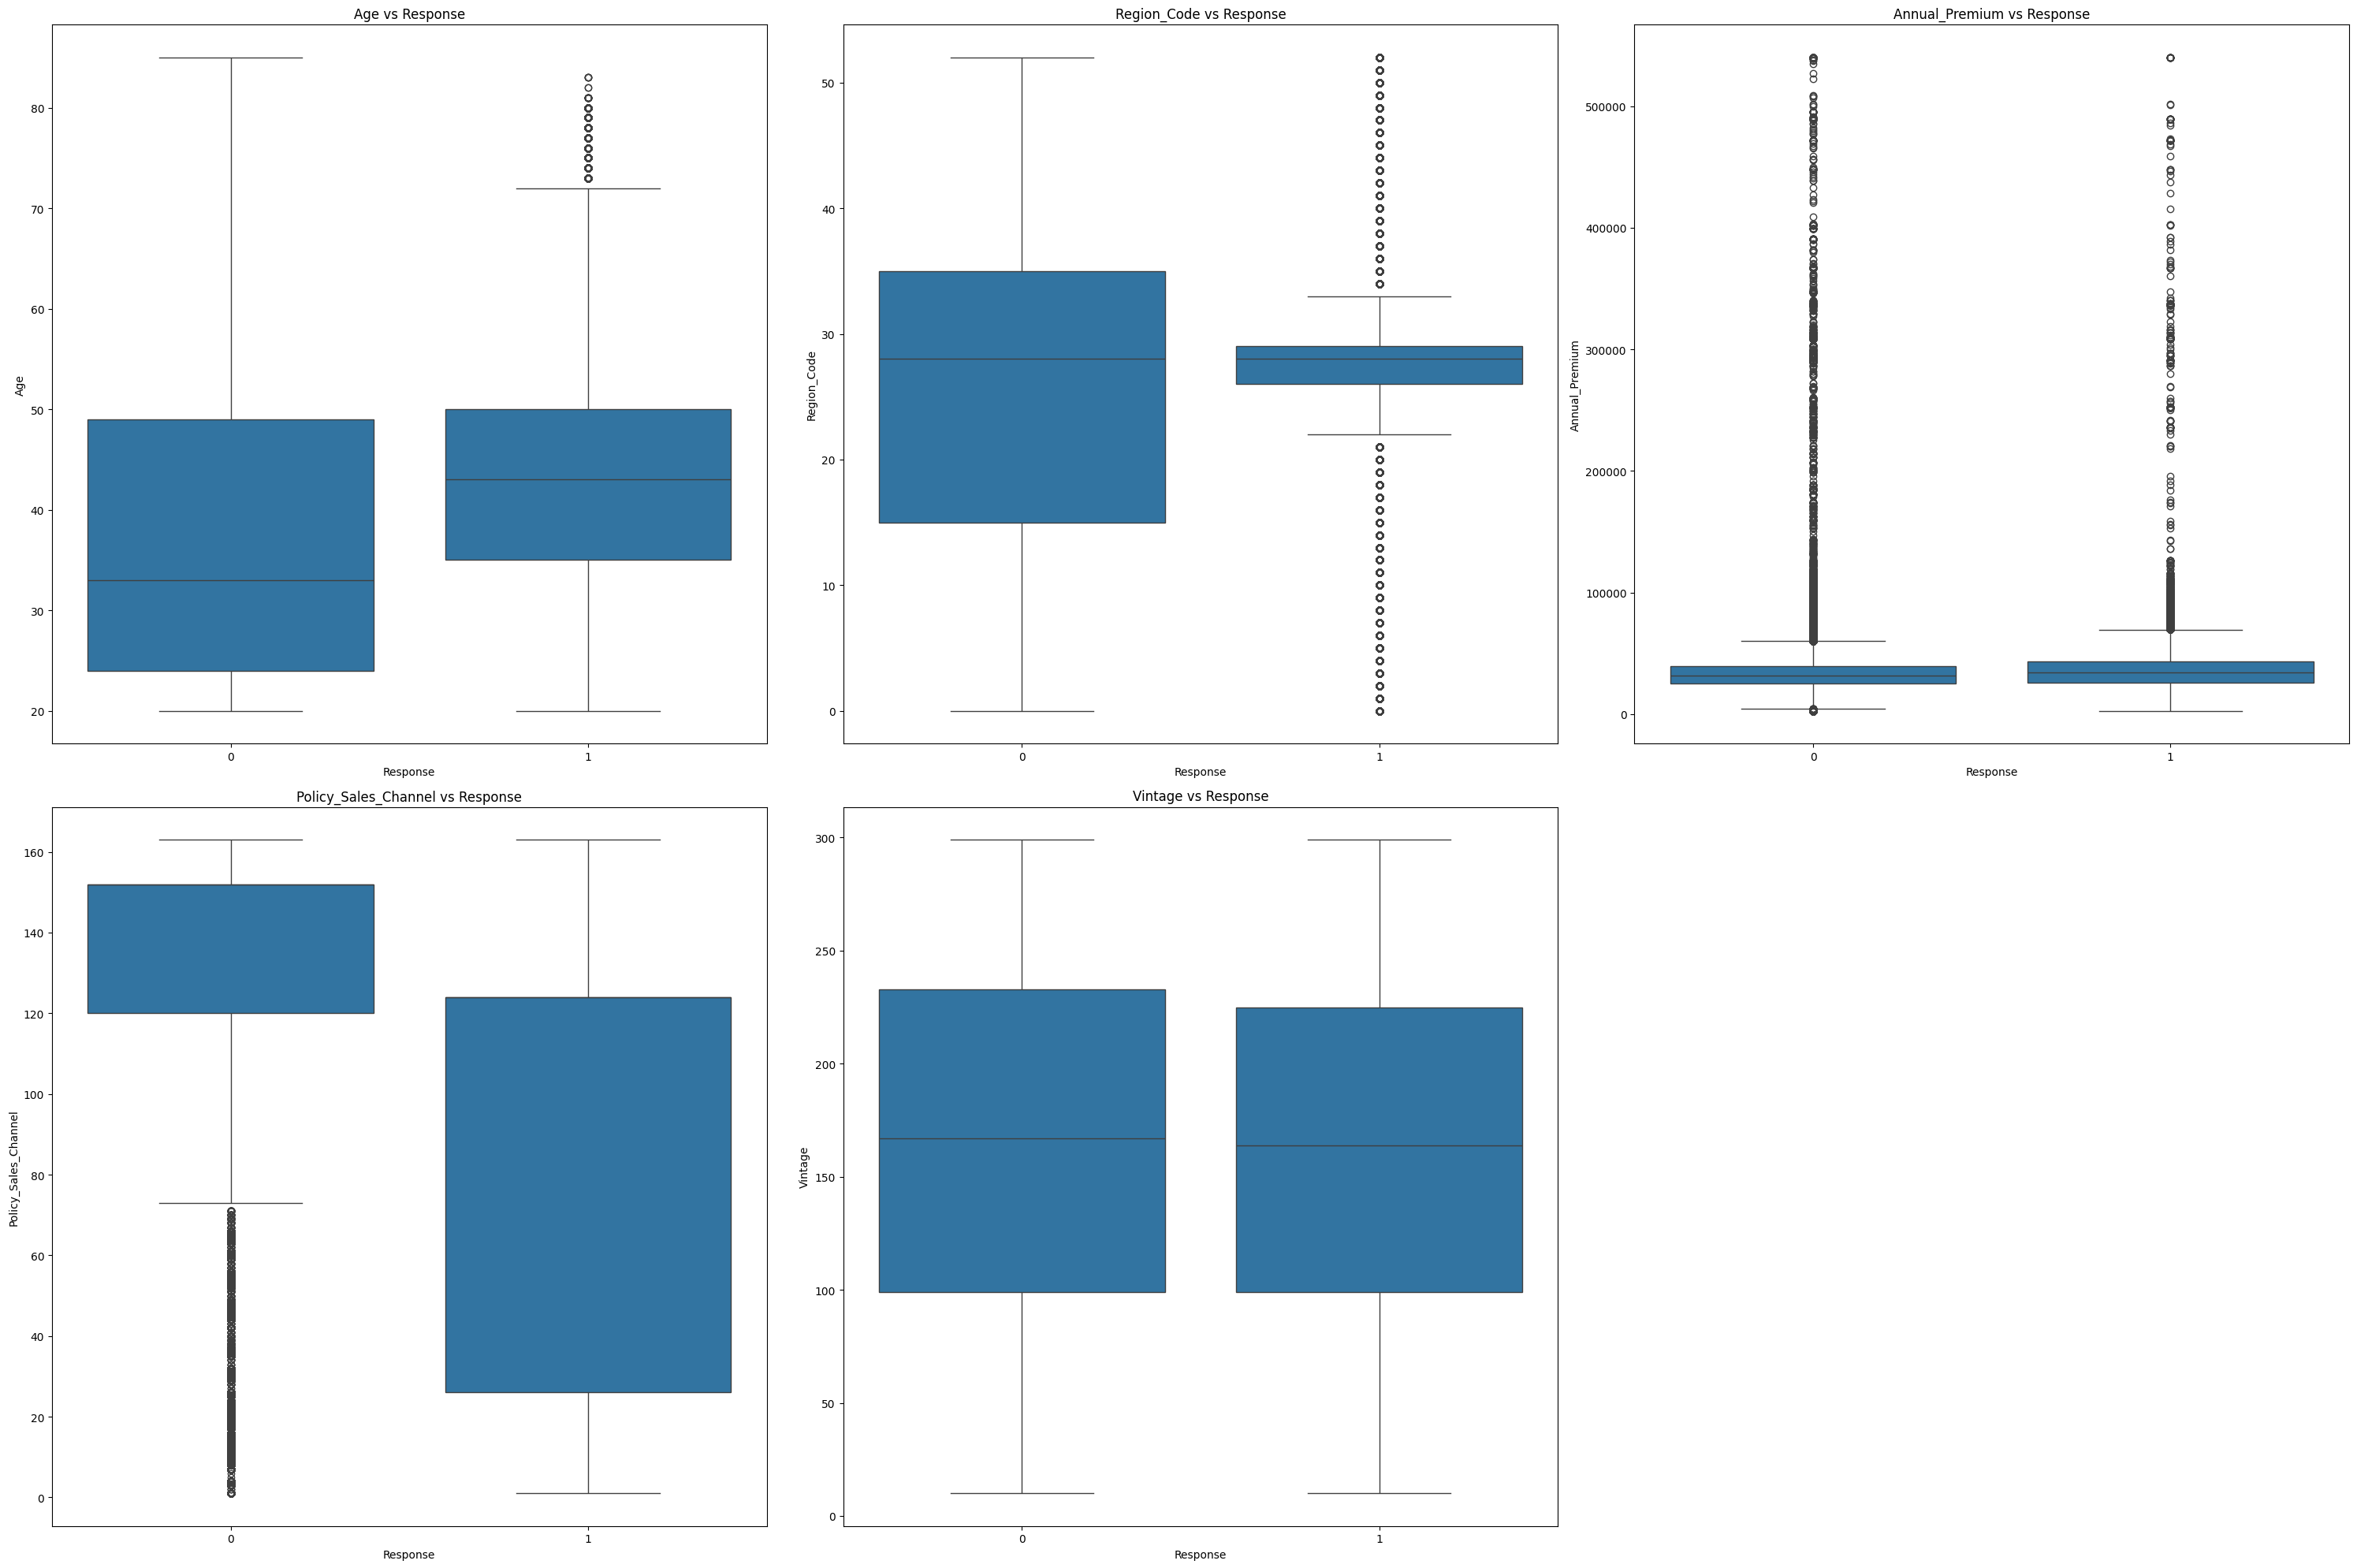

In [5]:
def plot_boxplots(df, response_col, cols, figsize=(30, 20)):
    n_cols = 3
    n_rows = (len(cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        sns.boxplot(x=response_col, y=col, data=df, ax=ax)
        ax.set_title(f'{col} vs {response_col}')
        ax.set_xlabel(response_col)
        ax.set_ylabel(col)

    # Remove any unused subplots
    for ax in axes[len(cols):]:
        ax.remove()

    plt.tight_layout()
    return fig

# Usage
fig = plot_boxplots(train_df, 'Response', config["raw_data"]["continuos_cols"])
plt.show()

<Axes: >

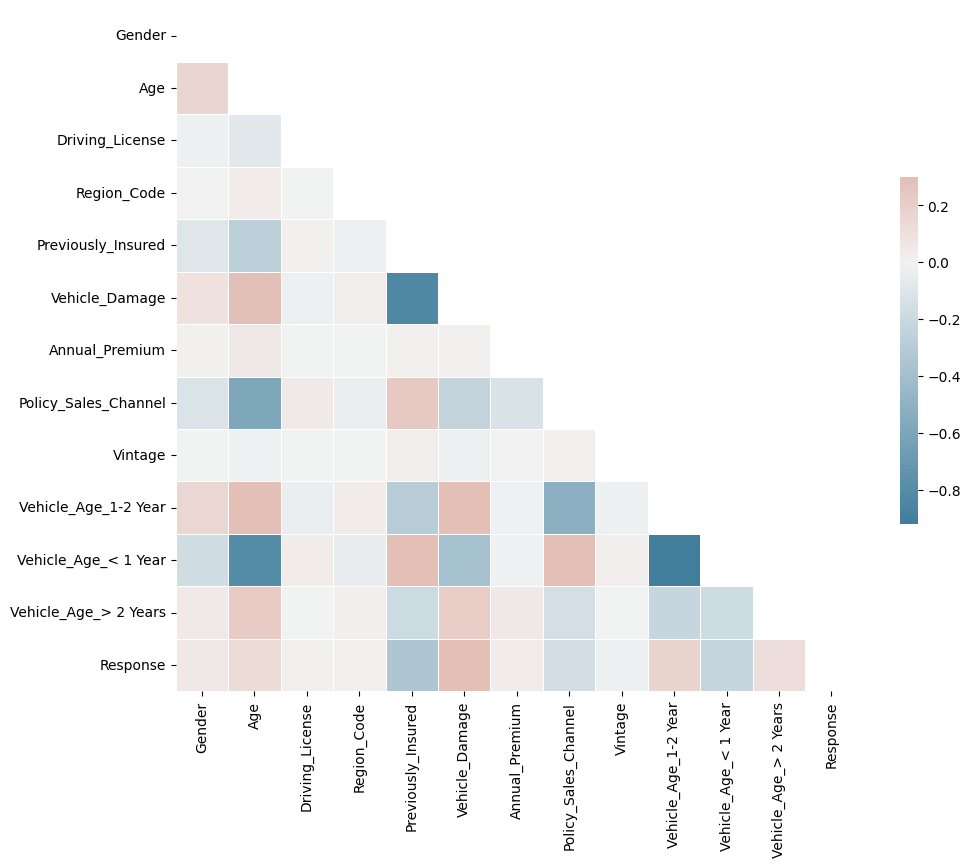

In [6]:
# Compute the correlation matrix
corr = train_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Feature Engineering

In [7]:
# Maybe after first base line run

## Modeling